In [1]:
#!pip install finance-datareader
#!pip install yfinance
#!pip install pandas_datareader

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
from pandas_datareader import data as pdr
%matplotlib inline

# 국내 상장 ETF 데이터 분석

## 1. ETF 전 종목 기본 정보 불러오기

In [3]:
etf = pd.read_csv('./data_0319_20220307.csv',encoding='UTF-8')
etf.head(20)
# len(df) :547

,표준코드,단축코드,한글종목명,한글종목약명,영문종목명,상장일,기초지수명,지수산출기관,추적배수,복제방법,기초시장분류,기초자산분류,상장좌수,운용사,CU수량,총보수,과세유형
0,KR7292340007,292340,DB 마이티 200커버드콜ATM레버리지증권상장지수투자신탁[주식-파생형],마이티 200커버드콜ATM레버리지,DB Mighty KOSPI200 Covered Call ATM Leverage ETF,2018/03/20,코스피 200 커버드콜 ATM 지수,KRX,2X 레버리지 (2),실물,국내,주식,"600,000",디비자산운용,"100,000",0.510,배당소득세(보유기간과세)
1,KR7159800002,159800,DB마이티K100증권상장지수투자신탁(주식),마이티 코스피100,DB Mighty K100 ETF,2012/07/05,코스피 100,KRX,일반 (1),실물,국내,주식,"280,000",디비자산운용,"40,000",0.390,비과세
2,KR7361580004,361580,KB KBSTAR 200 Total Return증권상장지수투자신탁(주식),KBSTAR 200TR,KB KBSTAR 200 Total Return ETF,2020/08/21,코스피 200 TR,KRX,일반 (1),실물,국내,주식,"2,800,000",케이비자산운용,"50,000",0.012,배당소득세(보유기간과세)
3,KR7285000006,285000,KB KBSTAR 200IT증권상장지수투자신탁(주식),KBSTAR 200IT,KB KBSTAR 200 Information Technology ETF,2017/12/08,코스피 200 정보기술,KRX,일반 (1),실물,국내,주식,"740,000",케이비자산운용,"20,000",0.190,비과세
4,KR7287300008,287300,KB KBSTAR 200건설증권상장지수투자신탁(주식),KBSTAR 200건설,KB KBSTAR 200 Constructions ETF,2017/12/22,코스피 200 건설,KRX,일반 (1),실물,국내,주식,"300,000",케이비자산운용,"20,000",0.190,비과세
5,KR7287310007,287310,KB KBSTAR 200경기소비재증권상장지수투자신탁(주식),KBSTAR 200경기소비재,KB KBSTAR 200 Consumer Discretionary ETF,2017/12/22,코스피 200 경기소비재,KRX,일반 (1),실물,국내,주식,"140,000",케이비자산운용,"20,000",0.190,비과세
6,KR7290080001,290080,KB KBSTAR 200고배당커버드콜ATM증권상장지수투자신탁(주식-파생형),KBSTAR 200고배당커버드콜ATM,KB KBSTAR 200 High Dividend Covered Call ATM ETF,2018/02/27,코스피 200 고배당커버드콜 ATM 지수(시장가격지수),KRX,일반 (1),실물,국내,주식,"700,000",케이비자산운용,"50,000",0.400,배당소득세(보유기간과세)
7,KR7284980000,284980,KB KBSTAR 200금융증권상장지수투자신탁(주식),KBSTAR 200금융,KB KBSTAR 200 Financials ETF,2017/12/08,코스피 200 금융,KRX,일반 (1),실물,국내,주식,"340,000",케이비자산운용,"20,000",0.190,비과세
8,KR7287320006,287320,KB KBSTAR 200산업재증권상장지수투자신탁(주식),KBSTAR 200산업재,KB KBSTAR 200 Industrials ETF,2017/12/22,코스피 200 산업재,KRX,일반 (1),실물,국내,주식,"120,000",케이비자산운용,"20,000",0.190,비과세
9,KR7287330005,287330,KB KBSTAR 200생활소비재증권상장지수투자신탁(주식),KBSTAR 200생활소비재,KB KBSTAR 200 Consumer Staples ETF,2017/12/22,코스피 200 생활소비재,KRX,일반 (1),실물,국내,주식,"240,000",케이비자산운용,"20,000",0.190,비과세


In [4]:
etf['기초자산분류'].value_counts()

주식      429
채권       60
원자재      19
혼합자산     16
통화       11
부동산       7
기타        5
Name: 기초자산분류, dtype: int64

In [5]:
etf['기초시장분류'].value_counts()

국내       372
해외       164
국내&해외     11
Name: 기초시장분류, dtype: int64

## 2. 종목별 1년간 주가 정보 불러오기

### [etf 기본정보 테이블에서 단축코드 추출 -> 종목별 주가 정보 얻기]

In [6]:
code = etf['단축코드'].values
code

array([292340, 159800, 361580, 285000, 287300, 287310, 290080, 284980,
       287320, 287330, 252400, 252420, 252410, 284990, 285010, 148020,
       285020, 315480, 105780, 290130, 368200, 367760, 367770, 388280,
       326240, 385560, 385550, 385540, 270800, 307010, 319870, 292050,
       403990, 234310, 241390, 401170, 300640, 266160, 282000, 114100,
       295020, 295000, 397410, 397420, 276650, 375270, 411720, 417450,
       399580, 336160, 326230, 272560, 196230, 315960, 252730, 252720,
       379780, 219390, 354240, 368590, 267490, 267500, 267450, 267440,
       388420, 140570, 140580, 379790, 183710, 310080, 174360, 136340,
       281990, 272570, 250730, 291680, 371150, 183700, 278240, 275750,
       270810, 361590, 302450, 334700, 334690, 253280, 253290, 225130,
       407310, 332930, 304780, 306520, 293180, 395290, 395280, 368190,
       402460, 395270, 367740, 407300, 381560, 381570, 346000, 304760,
       404470, 332940, 322400, 322410, 354350, 401590, 314700, 390950,
      

In [7]:
#FinanceDataReader 통해 전 종목 주가 불러오기 -> 딕셔너리 저장
etf_original ={}
for c in code.tolist():   
    etf_original[c] = fdr.DataReader(symbol=str(c), start='2021-03-07')


In [8]:
etf_original

{292340:              Open   High    Low  Close  Volume    Change
 Date                                                    
 2021-03-08  10090  10090   9840   9840       4 -0.004552
 2021-03-09   9650   9650   9650   9650      20 -0.019309
 2021-03-10   9845   9845   9805   9805     150  0.016062
 2021-03-11   9710  10020   9710  10020     177  0.021928
 2021-03-12  10095  10145  10095  10145       7  0.012475
 ...           ...    ...    ...    ...     ...       ...
 2022-03-14   8955   8955   8955   8955       0  0.000000
 2022-03-15   8855   8855   8855   8855       2 -0.011167
 2022-03-16   8920   9045   8920   9045       2  0.021457
 2022-03-17   9195   9225   9195   9225     525  0.019900
 2022-03-18   9200   9275   9200   9275       6  0.005420
 
 [256 rows x 6 columns],
 159800:              Open   High    Low  Close  Volume    Change
 Date                                                    
 2021-03-08  31674  31674  31674  31674      20  0.000000
 2021-03-09  31221  31221  31

### [코스피, 코스닥 지수]

In [9]:

# kospi = fdr.DataReader('IXIC', '2019-03-07').rename(columns={'Close':'Kospi'})
# kosdaq = fdr.DataReader(symbol='KQ11', start='2019-03-07').rename(columns={'Close':'Kosdaq'})
# yf.download("KOS11", start="20121-03-07")

In [10]:
yf.pdr_override()
kospi = pdr.get_data_yahoo("^KS11", start="2021-03-07").rename(columns={'Close':'Kospi'})
kosdaq = pdr.get_data_yahoo("^KQ11", start="2021-03-07").rename(columns={'Close':'Kosdaq'})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
kospi

,Open,High,Low,Kospi,Adj Close,Volume
Date,,,,,,
2021-03-08,3031.989990,3055.649902,2992.639893,2996.110107,2996.110107,1928300
2021-03-09,2989.959961,3000.489990,2929.360107,2976.120117,2976.120117,1534200
2021-03-10,2980.760010,3013.949951,2951.530029,2958.120117,2958.120117,905600
2021-03-11,2964.300049,3028.370117,2964.300049,3013.699951,3013.699951,1349200
2021-03-12,3030.729980,3061.429932,3030.729980,3054.389893,3054.389893,1669100
...,...,...,...,...,...,...
2022-03-14,2654.929932,2661.760010,2633.310059,2645.649902,2645.649902,635900
2022-03-15,2630.310059,2641.969971,2615.080078,2621.530029,2621.530029,603700
2022-03-16,2649.850098,2659.899902,2630.030029,2659.229980,2659.229980,736000


## 3. 전처리

### [종목별 주가 지수 데이터프레임 만들기 (종가 기준)]

In [12]:
etf_df = pd.concat(etf_original, axis=1)
etf_df

292340                                       159800                \
             Open   High    Low  Close Volume    Change   Open   High    Low   
2021-03-08  10090  10090   9840   9840      4 -0.004552  31674  31674  31674   
2021-03-09   9650   9650   9650   9650     20 -0.019309  31221  31221  31221   
2021-03-10   9845   9845   9805   9805    150  0.016062  31615  31615  31221   
2021-03-11   9710  10020   9710  10020    177  0.021928  31492  31492  31492   
2021-03-12  10095  10145  10095  10145      7  0.012475  31797  32073  31797   
...           ...    ...    ...    ...    ...       ...    ...    ...    ...   
2022-03-14   8955   8955   8955   8955      0  0.000000  27250  27250  27250   
2022-03-15   8855   8855   8855   8855      2 -0.011167  27180  27180  27180   
2022-03-16   8920   9045   8920   9045      2  0.021457  27215  27215  27215   
2022-03-17   9195   9225   9195   9225    525  0.019900  27930  27930  27930   
2022-03-18   9200   9275   9200   9275      6  0.005420  27930  27930  27930   

                   ...  391670                           391680          \
            Close  ...     Low   Close Volume    Change    Open    High   
2021-03-08  31674  ...     NaN     NaN    NaN       NaN     NaN     NaN   
2021-03-09  31221  ...     NaN     NaN    NaN       NaN     NaN     NaN   
2021-03-10  31221  ...     NaN     NaN    NaN       NaN     NaN     NaN   
2021-03-11  31492  ...     NaN     NaN    NaN       NaN     NaN     NaN   
2021-03-12  31940  ...     NaN     NaN    NaN       NaN     NaN     NaN   
...           ...  ...     ...     ...    ...       ...     ...     ...   
2022-03-14  27250  ...  8555.0  8555.0    1.0  0.002343  8350.0  8350.0   
2022-03-15  27180  ...  8515.0  8515.0    1.0 -0.004676  8275.0  8275.0   
2022-03-16  27215  ...  8525.0  8575.0    5.0  0.007046  8305.0  8360.0   
2022-03-17  27930  ...  8725.0  8725.0   12.0  0.017493  8510.0  8520.0   
2022-03-18  27930  ...  8730.0  8730.0    1.0  0.000573  8445.0  8525.0   

                                             
               Low   Close Volume    Change  
2021-03-08     NaN     NaN    NaN       NaN  
2021-03-09     NaN     NaN    NaN       NaN  
2021-03-10     NaN     NaN    NaN       NaN  
2021-03-11     NaN     NaN    NaN       NaN  
2021-03-12     NaN     NaN    NaN       NaN  
...            ...     ...    ...       ...  
2022-03-14  8350.0  8350.0    1.0  0.001800  
2022-03-15  8275.0  8275.0    1.0 -0.008982  
2022-03-16  8305.0  8355.0    7.0  0.009668  
2022-03-17  8510.0  8520.0   60.0  0.019749  
2022-03-18  8445.0  8525.0    5.0  0.000587  

[256 rows x 3228 columns]

In [13]:
etf_df.columns

MultiIndex([(292340,   'Open'),
            (292340,   'High'),
            (292340,    'Low'),
            (292340,  'Close'),
            (292340, 'Volume'),
            (292340, 'Change'),
            (159800,   'Open'),
            (159800,   'High'),
            (159800,    'Low'),
            (159800,  'Close'),
            ...
            (391670,    'Low'),
            (391670,  'Close'),
            (391670, 'Volume'),
            (391670, 'Change'),
            (391680,   'Open'),
            (391680,   'High'),
            (391680,    'Low'),
            (391680,  'Close'),
            (391680, 'Volume'),
            (391680, 'Change')],
           length=3228)

In [14]:
etf_close_list = list(filter(lambda x: 'Close' in x, etf_df.columns))
print(etf_close_list)

[(292340, 'Close'), (159800, 'Close'), (361580, 'Close'), (285000, 'Close'), (287300, 'Close'), (287310, 'Close'), (290080, 'Close'), (284980, 'Close'), (287320, 'Close'), (287330, 'Close'), (252400, 'Close'), (252420, 'Close'), (252410, 'Close'), (284990, 'Close'), (285010, 'Close'), (148020, 'Close'), (285020, 'Close'), (315480, 'Close'), (105780, 'Close'), (290130, 'Close'), (368200, 'Close'), (367760, 'Close'), (367770, 'Close'), (388280, 'Close'), (326240, 'Close'), (385560, 'Close'), (385550, 'Close'), (385540, 'Close'), (270800, 'Close'), (307010, 'Close'), (319870, 'Close'), (292050, 'Close'), (403990, 'Close'), (234310, 'Close'), (241390, 'Close'), (401170, 'Close'), (300640, 'Close'), (266160, 'Close'), (282000, 'Close'), (114100, 'Close'), (295020, 'Close'), (295000, 'Close'), (397410, 'Close'), (397420, 'Close'), (276650, 'Close'), (375270, 'Close'), (411720, 'Close'), (417450, 'Close'), (399580, 'Close'), (336160, 'Close'), (326230, 'Close'), (272560, 'Close'), (196230, 'C

In [15]:
new_column_name = list(map(lambda x: x[0], etf_close_list))
print(new_column_name)

[292340, 159800, 361580, 285000, 287300, 287310, 290080, 284980, 287320, 287330, 252400, 252420, 252410, 284990, 285010, 148020, 285020, 315480, 105780, 290130, 368200, 367760, 367770, 388280, 326240, 385560, 385550, 385540, 270800, 307010, 319870, 292050, 403990, 234310, 241390, 401170, 300640, 266160, 282000, 114100, 295020, 295000, 397410, 397420, 276650, 375270, 411720, 417450, 399580, 336160, 326230, 272560, 196230, 315960, 252730, 252720, 379780, 219390, 354240, 368590, 267490, 267500, 267450, 267440, 388420, 140570, 140580, 379790, 183710, 310080, 174360, 136340, 281990, 272570, 250730, 291680, 371150, 183700, 278240, 275750, 270810, 361590, 302450, 334700, 334690, 253280, 253290, 225130, 407310, 332930, 304780, 306520, 293180, 395290, 395280, 368190, 402460, 395270, 367740, 407300, 381560, 381570, 346000, 304760, 404470, 332940, 322400, 322410, 354350, 401590, 314700, 390950, 419170, 306530, 304770, 375760, 140950, 152870, 192720, 176710, 403790, 137930, 407160, 407170, 310960,

In [16]:
etf_close_price_df = pd.concat(list(map(lambda x:etf_df[x], etf_close_list)), axis=1)
etf_close_price_df

,292340,159800,361580,285000,287300,287310,290080,284980,287320,287330,...,328370,301440,376250,213630,189400,195970,195980,215620,391670,391680
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
2021-03-08,9840,31674,20890,16852,10665,11544,7090,8149,10698,8622,...,15000,11173,9710,14515,15900,11310,12770,10706,NaN,NaN
2021-03-09,9650,31221,20760,16763,10729,11564,7153,8333,10473,8632,...,14860,11079,9670,14940,15840,11450,12555,10633,NaN,NaN
2021-03-10,9805,31221,20645,16580,10557,11377,7081,8246,10568,8627,...,14825,11030,9605,14700,16095,11500,12720,10628,NaN,NaN
2021-03-11,10020,31492,21080,17095,10813,11465,7144,8309,10743,8676,...,15100,11198,9795,14890,16215,11600,12925,10642,NaN,NaN
2021-03-12,10145,31940,21250,17367,11108,11668,7149,8250,10937,8730,...,15310,11361,9915,14970,16410,11685,13125,10711,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,8955,27250,18505,14275,12790,9450,8355,8980,11470,7190,...,13630,11715,8740,16410,16060,10540,10155,12020,8555.0,8350.0
2022-03-15,8855,27180,18325,14160,12365,9460,8325,9065,11560,7145,...,13510,11605,8660,16470,15875,10775,9845,11985,8515.0,8275.0
2022-03-16,9045,27215,18580,14450,12505,9685,8350,9090,11735,7220,...,13655,11760,8800,16480,16040,10870,10090,12015,8575.0,8355.0


In [17]:
etf_close_price_df.columns = new_column_name
etf_close_price_df = pd.concat([etf_close_price_df, kospi['Kospi'], kosdaq['Kosdaq']], axis=1)
etf_close_price_df

,292340,159800,361580,285000,287300,287310,290080,284980,287320,287330,...,376250,213630,189400,195970,195980,215620,391670,391680,Kospi,Kosdaq
2021-03-08,9840,31674,20890,16852,10665,11544,7090,8149,10698,8622,...,9710,14515,15900,11310,12770,10706,NaN,NaN,2996.110107,904.770020
2021-03-09,9650,31221,20760,16763,10729,11564,7153,8333,10473,8632,...,9670,14940,15840,11450,12555,10633,NaN,NaN,2976.120117,896.359985
2021-03-10,9805,31221,20645,16580,10557,11377,7081,8246,10568,8627,...,9605,14700,16095,11500,12720,10628,NaN,NaN,2958.120117,890.070007
2021-03-11,10020,31492,21080,17095,10813,11465,7144,8309,10743,8676,...,9795,14890,16215,11600,12925,10642,NaN,NaN,3013.699951,908.010010
2021-03-12,10145,31940,21250,17367,11108,11668,7149,8250,10937,8730,...,9915,14970,16410,11685,13125,10711,NaN,NaN,3054.389893,925.489990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,8955,27250,18505,14275,12790,9450,8355,8980,11470,7190,...,8740,16410,16060,10540,10155,12020,8555.0,8350.0,2645.649902,872.440002
2022-03-15,8855,27180,18325,14160,12365,9460,8325,9065,11560,7145,...,8660,16470,15875,10775,9845,11985,8515.0,8275.0,2621.530029,871.219971
2022-03-16,9045,27215,18580,14450,12505,9685,8350,9090,11735,7220,...,8800,16480,16040,10870,10090,12015,8575.0,8355.0,2659.229980,891.799988
2022-03-17,9225,27930,18875,14845,12540,9755,8335,9195,11820,7230,...,8940,16550,16555,11105,10560,12070,8725.0,8520.0,2694.510010,914.130005


### [수익률 데이터프레임 생성 및 결측치 처리]

In [18]:
rows = len(etf_close_price_df.index)
columns = etf_close_price_df.columns
cleaned_etf_df = etf_close_price_df.copy()

기준: 1년 전(2021년 3월 7일) 또는 2021년 3월 7일 이후 상장된 경우 상장일

In [19]:
#수익률 데이터 프레임 생성
for column in columns:
    base = etf_close_price_df.isna()[column].values.tolist().index(False)
    for i in range(base+1, rows):
        cleaned_etf_df[column].iloc[i] = (etf_close_price_df[column].iloc[i]/etf_close_price_df[column].iloc[base]-1)*100

C:\Users\YJ\anaconda3\envs\test\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
cleaned_etf_df

,292340,159800,361580,285000,287300,287310,290080,284980,287320,287330,...,376250,213630,189400,195970,195980,215620,391670,391680,Kospi,Kosdaq
2021-03-08,9840.000000,31674.000000,20890.000000,16852.000000,10665.000000,11544.000000,7090.000000,8149.000000,10698.000000,8622.000000,...,9710.000000,14515.000000,15900.000000,11310.000000,12770.000000,10706.000000,NaN,NaN,2996.110107,904.770020
2021-03-09,-1.930894,-1.430195,-0.622307,-0.528127,0.600094,0.173250,0.888575,2.257946,-2.103197,0.115982,...,-0.411946,2.928006,-0.377358,1.237843,-1.683634,-0.681861,NaN,NaN,-0.667198,-0.929522
2021-03-10,-0.355691,-1.430195,-1.172810,-1.614052,-1.012658,-1.446639,-0.126939,1.190330,-1.215180,0.057991,...,-1.081359,1.274544,1.226415,1.679929,-0.391543,-0.728563,NaN,NaN,-1.267977,-1.624724
2021-03-11,1.829268,-0.574604,0.909526,1.441965,1.387717,-0.684338,0.761636,1.963431,0.420639,0.626305,...,0.875386,2.583534,1.981132,2.564103,1.213782,-0.597796,NaN,NaN,0.587089,0.358101
2021-03-12,3.099593,0.839806,1.723313,3.056017,4.153774,1.074151,0.832158,1.239416,2.234062,1.252610,...,2.111226,3.134688,3.207547,3.315650,2.779953,0.046703,NaN,NaN,1.945182,2.290081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,-8.993902,-13.967292,-11.416946,-15.291953,19.924988,-18.139293,17.842031,10.197570,7.216302,-16.608675,...,-9.989701,13.055460,1.006289,-6.808134,-20.477682,12.273492,-15.002484,-16.791231,-11.697174,-3.573286
2022-03-15,-10.010163,-14.188293,-12.278602,-15.974365,15.939991,-18.052668,17.418900,11.240643,8.057581,-17.130596,...,-10.813594,13.468825,-0.157233,-4.730327,-22.905247,11.946572,-15.399901,-17.538615,-12.502213,-3.708130
2022-03-16,-8.079268,-14.077793,-11.057922,-14.253501,17.252696,-16.103604,17.771509,11.547429,9.693401,-16.260728,...,-9.371782,13.537720,0.880503,-3.890363,-20.986688,12.226789,-14.803775,-16.741405,-11.243917,-1.433517
2022-03-17,-6.250000,-11.820421,-9.645764,-11.909566,17.580872,-15.497228,17.559944,12.835931,10.487942,-16.144746,...,-7.929969,14.019979,4.119497,-1.812555,-17.306186,12.740519,-13.313462,-15.097160,-10.066389,1.034515


In [21]:
#수익률 산정 기준값 행 삭제
cleaned_etf_df.drop(['2021-03-08'], inplace=True)
# for column in columns:
#     base = cleaned_etf_df.isna()[column].values.tolist().index(False)
#     cleaned_etf_df[column].iloc[base] =0
    
#결측치(NaN-상장 전 값 없음) 0으로 변환
cleaned_etf_df = cleaned_etf_df.fillna(0)

In [22]:
cleaned_etf_df

,292340,159800,361580,285000,287300,287310,290080,284980,287320,287330,...,376250,213630,189400,195970,195980,215620,391670,391680,Kospi,Kosdaq
2021-03-09,-1.930894,-1.430195,-0.622307,-0.528127,0.600094,0.173250,0.888575,2.257946,-2.103197,0.115982,...,-0.411946,2.928006,-0.377358,1.237843,-1.683634,-0.681861,0.000000,0.000000,-0.667198,-0.929522
2021-03-10,-0.355691,-1.430195,-1.172810,-1.614052,-1.012658,-1.446639,-0.126939,1.190330,-1.215180,0.057991,...,-1.081359,1.274544,1.226415,1.679929,-0.391543,-0.728563,0.000000,0.000000,-1.267977,-1.624724
2021-03-11,1.829268,-0.574604,0.909526,1.441965,1.387717,-0.684338,0.761636,1.963431,0.420639,0.626305,...,0.875386,2.583534,1.981132,2.564103,1.213782,-0.597796,0.000000,0.000000,0.587089,0.358101
2021-03-12,3.099593,0.839806,1.723313,3.056017,4.153774,1.074151,0.832158,1.239416,2.234062,1.252610,...,2.111226,3.134688,3.207547,3.315650,2.779953,0.046703,0.000000,0.000000,1.945182,2.290081
2021-03-15,2.997967,0.483046,1.220680,2.498220,6.282232,1.671864,1.918195,1.902074,2.514489,2.110879,...,1.596292,4.684809,3.144654,3.138815,0.783085,1.242294,0.000000,0.000000,1.655475,2.445926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,-8.993902,-13.967292,-11.416946,-15.291953,19.924988,-18.139293,17.842031,10.197570,7.216302,-16.608675,...,-9.989701,13.055460,1.006289,-6.808134,-20.477682,12.273492,-15.002484,-16.791231,-11.697174,-3.573286
2022-03-15,-10.010163,-14.188293,-12.278602,-15.974365,15.939991,-18.052668,17.418900,11.240643,8.057581,-17.130596,...,-10.813594,13.468825,-0.157233,-4.730327,-22.905247,11.946572,-15.399901,-17.538615,-12.502213,-3.708130
2022-03-16,-8.079268,-14.077793,-11.057922,-14.253501,17.252696,-16.103604,17.771509,11.547429,9.693401,-16.260728,...,-9.371782,13.537720,0.880503,-3.890363,-20.986688,12.226789,-14.803775,-16.741405,-11.243917,-1.433517
2022-03-17,-6.250000,-11.820421,-9.645764,-11.909566,17.580872,-15.497228,17.559944,12.835931,10.487942,-16.144746,...,-7.929969,14.019979,4.119497,-1.812555,-17.306186,12.740519,-13.313462,-15.097160,-10.066389,1.034515


## 4. 분석 및 시각화

### [코스피, 코스닥 1년전 기준 수익률 비교]

Text(0.5, 1.0, '코스피, 코스닥 수익률 비교(1년)')

C:\Users\YJ\anaconda3\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


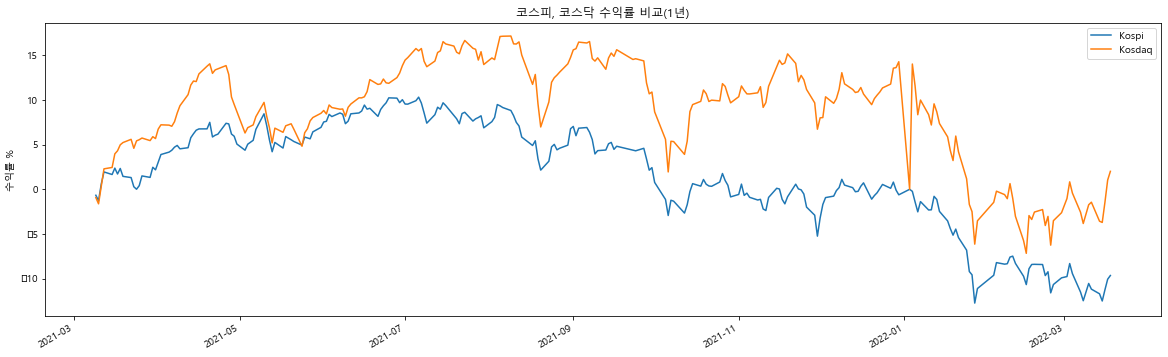

In [23]:
plt.rc('font', family='Malgun Gothic')

kospi_kosdaq = cleaned_etf_df[['Kospi','Kosdaq']]
# df3= pd.concat([etf_close_price3['Kospi'],etf_close_price3['Kosdaq']], axis=1)
kospi_kosdaq.plot(figsize=(20,6))
plt.ylabel('수익률 %')
plt.title('코스피, 코스닥 수익률 비교(1년)')

### [2022년 3월 8일 기준 수익률 top10 종목]

In [24]:
#etf 데이터프레임 인덱스 단축코드로 변경
etf2 = etf.set_index('단축코드')
etf2

,표준코드,한글종목명,한글종목약명,영문종목명,상장일,기초지수명,지수산출기관,추적배수,복제방법,기초시장분류,기초자산분류,상장좌수,운용사,CU수량,총보수,과세유형
단축코드,,,,,,,,,,,,,,,,
292340,KR7292340007,DB 마이티 200커버드콜ATM레버리지증권상장지수투자신탁[주식-파생형],마이티 200커버드콜ATM레버리지,DB Mighty KOSPI200 Covered Call ATM Leverage ETF,2018/03/20,코스피 200 커버드콜 ATM 지수,KRX,2X 레버리지 (2),실물,국내,주식,"600,000",디비자산운용,"100,000",0.510,배당소득세(보유기간과세)
159800,KR7159800002,DB마이티K100증권상장지수투자신탁(주식),마이티 코스피100,DB Mighty K100 ETF,2012/07/05,코스피 100,KRX,일반 (1),실물,국내,주식,"280,000",디비자산운용,"40,000",0.390,비과세
361580,KR7361580004,KB KBSTAR 200 Total Return증권상장지수투자신탁(주식),KBSTAR 200TR,KB KBSTAR 200 Total Return ETF,2020/08/21,코스피 200 TR,KRX,일반 (1),실물,국내,주식,"2,800,000",케이비자산운용,"50,000",0.012,배당소득세(보유기간과세)
285000,KR7285000006,KB KBSTAR 200IT증권상장지수투자신탁(주식),KBSTAR 200IT,KB KBSTAR 200 Information Technology ETF,2017/12/08,코스피 200 정보기술,KRX,일반 (1),실물,국내,주식,"740,000",케이비자산운용,"20,000",0.190,비과세
287300,KR7287300008,KB KBSTAR 200건설증권상장지수투자신탁(주식),KBSTAR 200건설,KB KBSTAR 200 Constructions ETF,2017/12/22,코스피 200 건설,KRX,일반 (1),실물,국내,주식,"300,000",케이비자산운용,"20,000",0.190,비과세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195970,KR7195970009,한화ARIRANG MSCI EAFE 증권상장지수투자신탁(주식-파생형)(합성 H),ARIRANG 선진국MSCI(합성 H),Hanwha ARIRANG SYNTH-MSCI EAFE ETF(H),2014/05/13,MSCI EAFE Index,MSCI,일반 (1),합성,해외,주식,"600,000",한화자산운용,"20,000",0.500,배당소득세(보유기간과세)
195980,KR7195980008,한화ARIRANG MSCI Emerging Markets 증권상장지수투자신탁(주식-...,ARIRANG 신흥국MSCI(합성 H),Hanwha ARIRANG SYNTH-MSCI Emerging Markets ETF(H),2014/05/13,MSCI EM Index,MSCI,일반 (1),합성,해외,주식,"6,720,000",한화자산운용,"20,000",0.500,배당소득세(보유기간과세)
215620,KR7215620006,흥국 HK S&P로우볼증권상장지수투자신탁(주식),HK S&P코리아로우볼,Heungkuk HK S&P Korea Low Volatility ETF,2015/03/25,S&P Korea 저변동성 지수,S&P,일반 (1),실물,국내,주식,"450,000",흥국자산운용,"30,000",0.400,비과세


In [25]:
# 수익률 column 
last_index = len(cleaned_etf_df)-1
profit = cleaned_etf_df.iloc[last_index]
profit.pop('Kospi')
profit.pop('Kosdaq')
profit = pd.DataFrame(profit)
profit.columns = ['수익률']
profit.index = list(map(lambda x: int(x), profit.index))

profit

,수익률
292340,-5.741870
159800,-11.820421
361580,-9.382480
285000,-11.820555
287300,17.252696
...,...
195970,-0.221043
195980,-17.071261
215620,12.740519
391670,-13.263785


In [26]:
#위 etf2 와 수익률 column 합치기
cleaned_etf = pd.concat([etf2, profit], axis=1)

#수익률 결측 행 삭제
cleaned_etf.dropna(inplace=True)
etf_name = cleaned_etf.sort_values(by='수익률', ascending=False)['기초지수명'].values
etf_rate = cleaned_etf.sort_values(by='수익률', ascending=False)['수익률'].values

In [27]:
#top10
cleaned_etf[['한글종목명', '기초지수명', '수익률']].sort_values(by='수익률', ascending=False).head(10)

,한글종목명,기초지수명,수익률
261220,삼성 KODEX WTI원유선물특별자산상장지수투자신탁[원유-파생형](H),S&P GSCI Crude Oil Index ER,69.638435
130680,미래에셋 TIGER 원유선물 특별자산상장지수투자신탁(원유-파생형),S&P GSCI Crude Oil Enhanced Index ER,69.636964
371130,한국투자KINDEX블룸버그베트남VN30선물레버리지증권상장지수투자신탁(주식-파생형)(H),Bloomberg VN30 Futures Excess Return Index,56.331543
218420,삼성 KODEX 미국에너지 증권상장지수투자신탁[주식-파생형](합성),S&P Select Sector Energy Index,46.306818
139310,미래에셋 TIGER 금속선물 특별자산상장지수투자신탁(금속-파생형),S&P GSCI Industrial Metals Select Index(TR),43.663123
271060,삼성 KODEX 3대농산물선물특별자산상장지수투자신탁[농산물-파생형](H),S&P GSCI Grains Select Index ER,41.670714
137610,미래에셋 TIGER 농산물선물 특별자산상장지수투자신탁(농산물-파생형),S&P GSCI Agriculture Enhanced Index(ER),40.517241
371460,미래에셋 TIGER 차이나전기차SOLACTIVE증권상장지수투자신탁(주식-파생형),Solactive China Electric Vehicle Index(Net Tot...,40.113798
228810,미래에셋 TIGER 미디어컨텐츠 증권상장지수투자신탁(주식),WISE 미디어컨텐츠 지수,38.070692
219390,KB KBSTAR 미국S&P원유생산기업증권상장지수투자신탁(주식-파생형)(합성 H),S&P Oil & Gas Exploration & Production Select ...,37.300613


C:\Users\YJ\anaconda3\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


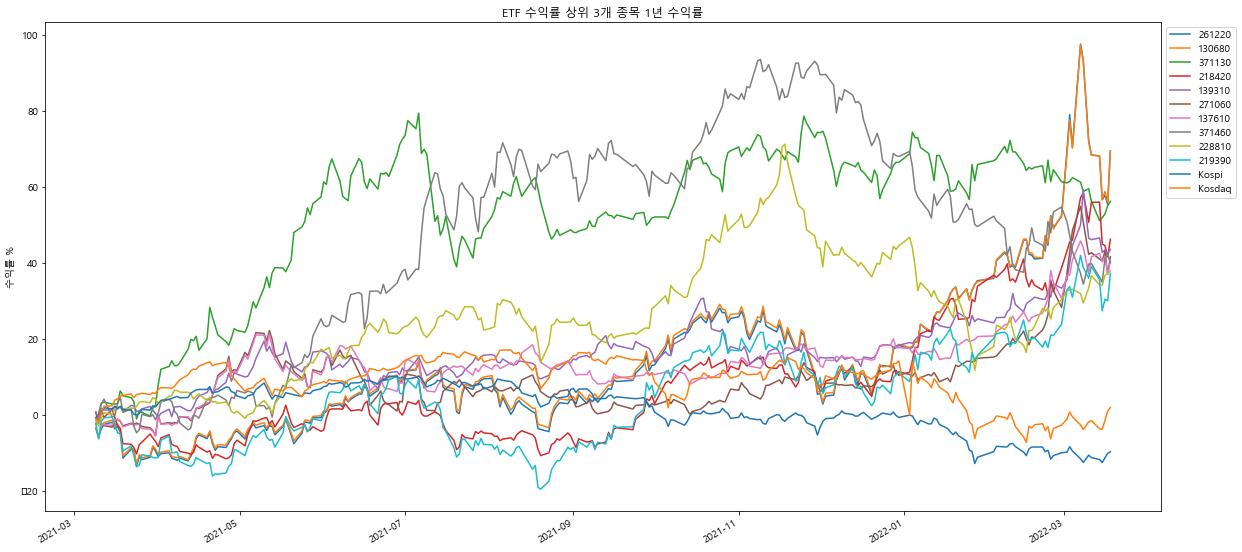

In [28]:
top_ten = cleaned_etf.sort_values(by='수익률', ascending=False).index[:10]

top_ten2 = cleaned_etf_df[top_ten.tolist()+['Kospi','Kosdaq']]
top_ten2.plot(figsize=(20,10))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('수익률 %')
plt.title('ETF 수익률 상위 3개 종목 1년 수익률')
plt.show()

### [전 종목 수익률 빈도 및 확률 분포]

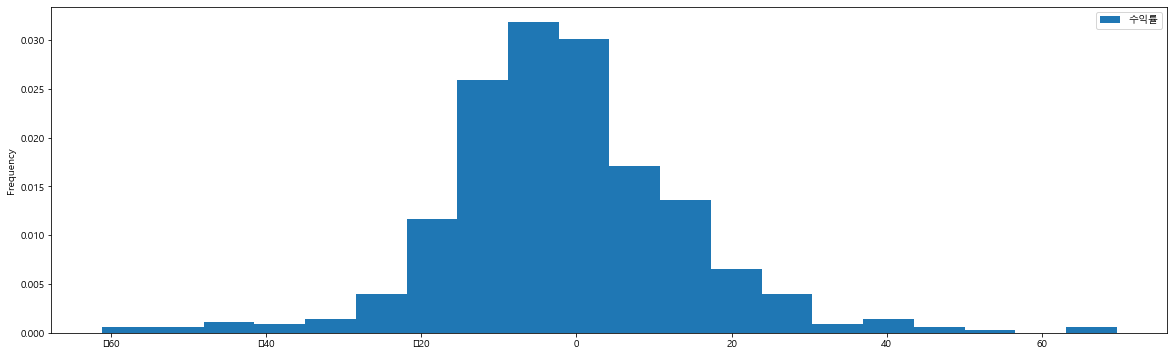

In [29]:
#빈도수
fig, ax = plt.subplots(figsize=(20,6))
cleaned_etf.plot(kind='hist', y='수익률', bins=20, density=True, ax=ax)
plt.show()

In [30]:
mean = cleaned_etf['수익률'].mean()

kospi_yield = cleaned_etf_df['Kospi'].iloc[last_index]
kosdaq_yield = cleaned_etf_df['Kosdaq'].iloc[last_index]

mean

-1.6796422961080606

C:\Users\YJ\anaconda3\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


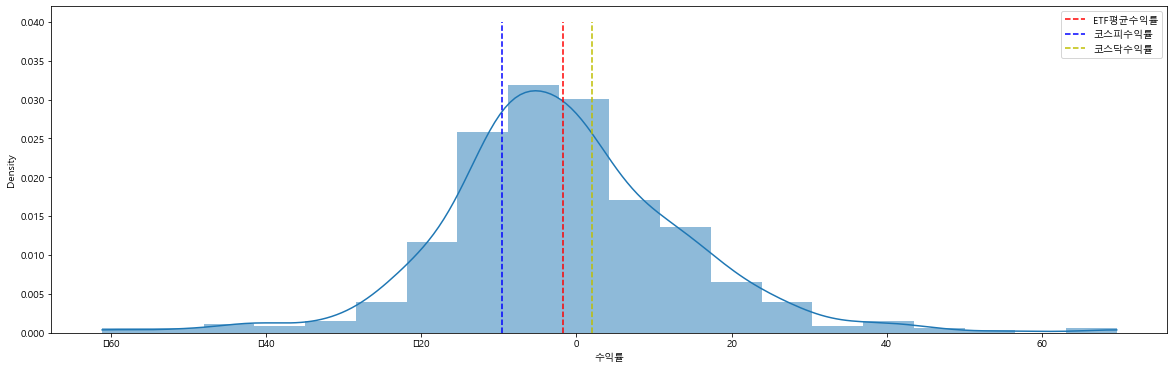

In [31]:
#확률 분포 (평균값, 코스피 수익률 비교)
fig, ax = plt.subplots(figsize=(20,6))
sns.histplot(cleaned_etf['수익률'], ax=ax, bins=20, kde=True, stat='density', linewidth=0)
plt.plot([mean, mean], [0,0.04], "r--", label="ETF평균수익률")
plt.plot([kospi_yield,kospi_yield], [0,0.04], "b--", label="코스피수익률")
plt.plot([kosdaq_yield,kosdaq_yield], [0,0.04], "y--", label="코스닥수익률")
plt.legend()
plt.show()

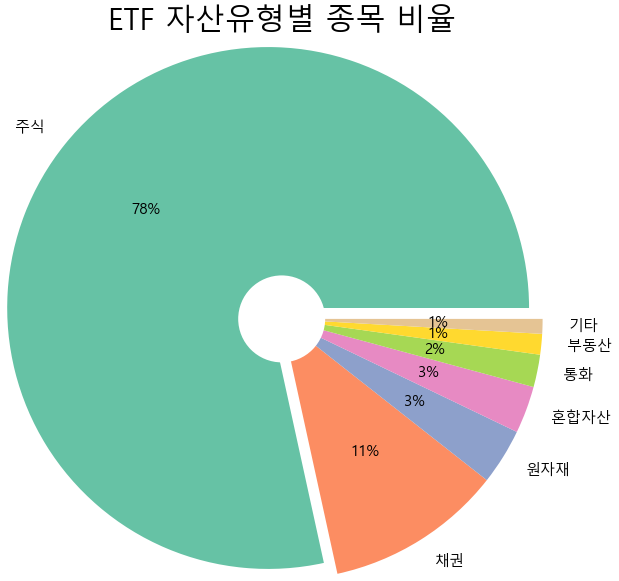

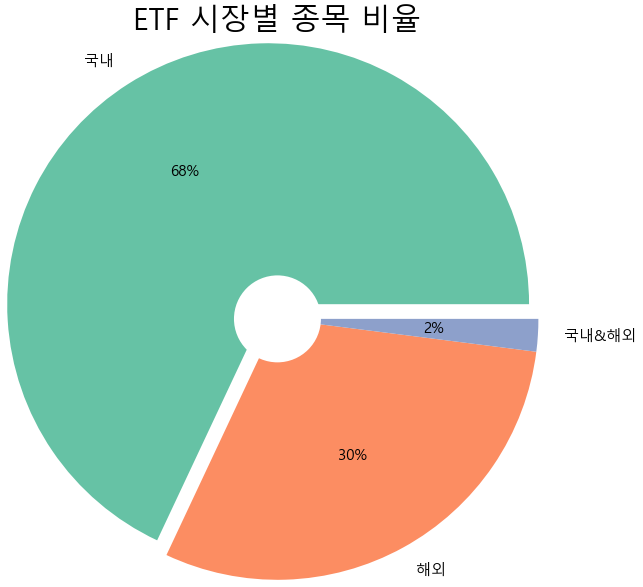

In [32]:
cmap = plt.get_cmap('Set2')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

labels1 = etf['기초자산분류'].value_counts().index.tolist()
fracs1 = etf['기초자산분류'].value_counts().values.tolist()
explode1=(0.2,0,0,0,0,0,0)


plt.pie(fracs1, explode=explode1, labels = labels1, autopct = "%.0f%%", shadow= False, colors=colors, radius=3, textprops = {'fontsize':15}) #wedgeprops=["linewidth":2, "edgecolor":"black"]
#donut
centre_circle = plt.Circle((0,0),0.5, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('ETF 자산유형별 종목 비율', fontsize=30,pad=180)

plt.show()

labels2 = etf['기초시장분류'].value_counts().index.tolist()
fracs2 = etf['기초시장분류'].value_counts().values.tolist()
explode2=(0.2,0,0)

plt.pie(fracs2, explode=explode2, labels = labels2, autopct = "%.0f%%", shadow= False, colors=colors, radius=3, textprops = {'fontsize':15}) #wedgeprops=["linewidth":2, "edgecolor":"black"]
#donut
centre_circle = plt.Circle((0,0),0.5, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('ETF 시장별 종목 비율', fontsize=30,pad=180)

plt.show()

In [33]:
sector = cleaned_etf.groupby('기초자산분류')['수익률'].mean().sort_values(ascending=False)
sector

기초자산분류
부동산     19.434444
기타      17.046197
원자재     13.474975
혼합자산     1.098003
통화      -0.534900
채권      -0.691493
주식      -3.216997
Name: 수익률, dtype: float64

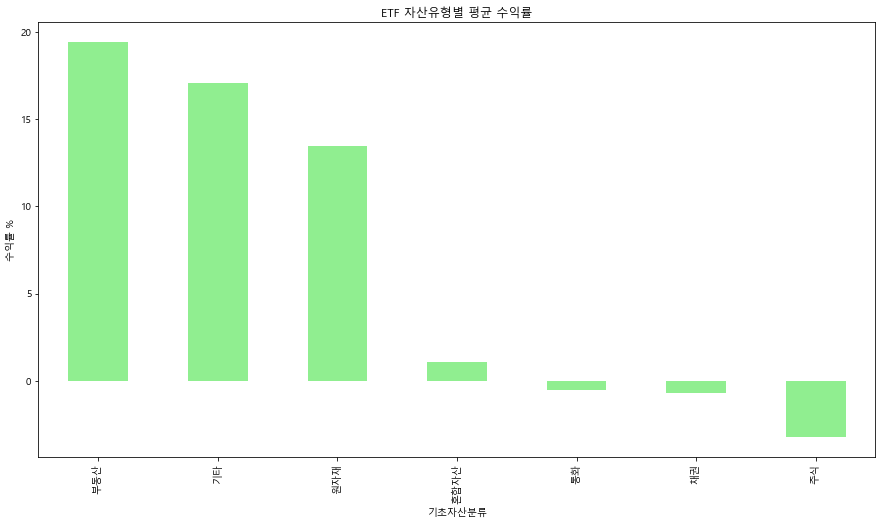

In [34]:
plt.figure(figsize=(15,8))
plt.title('ETF 자산유형별 평균 수익률')
sector.plot(kind='bar', color='lightgreen')
plt.ylabel('수익률 %')
plt.show()

In [35]:
market = cleaned_etf.groupby('기초시장분류')['수익률'].mean().sort_values(ascending=False)
market

기초시장분류
해외       3.244754
국내&해외   -0.496638
국내      -3.920548
Name: 수익률, dtype: float64

C:\Users\YJ\anaconda3\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


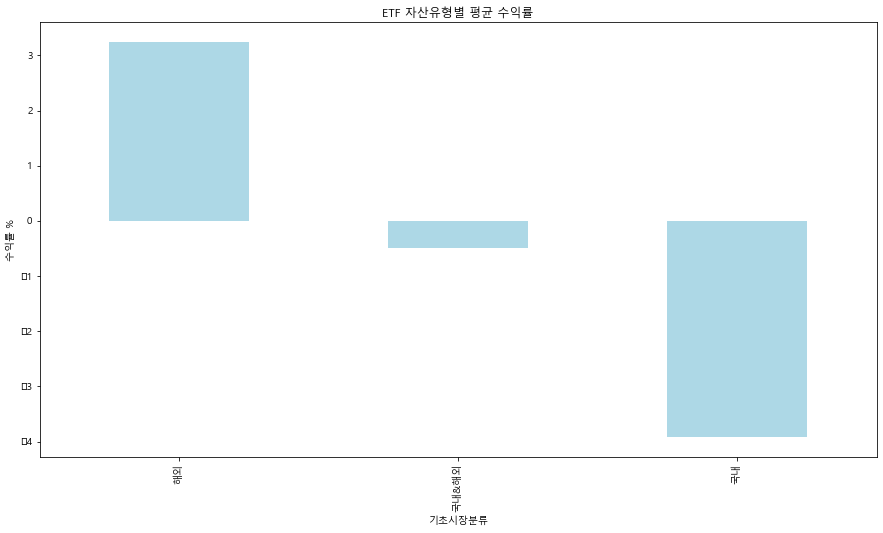

In [36]:
plt.figure(figsize=(15,8))
plt.title('ETF 자산유형별 평균 수익률')
plt.ylabel('수익률 %')
market.plot(kind='bar', color='lightblue')
plt.show()